In [1]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio,my_util
import copy as cp
import scipy
from scipy.signal import find_peaks
import IPython.display as ipd

EQ_f_tbl = [100,125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3200,4000,5000]

a2i = [0,23,22,24,24,13,6,-2,-10,-24,-24,-24,-20,-5,7,13,10,0]
a2u = [0,-2,16,15,17,20,14,9,3,9,-20,-23,-22,-21,-3,-5,0,0]
a2e = [0,0,0,0,0,8,16,10,-1,-13,-22,-10,5,0,0,0,0,0]
a2o = [0,0,0,0,0,0,11,16,16,13,-4,-16,-10,0,0,0,0,0]

def amp2db(x):
    return 20 * np.log10(np.maximum(1e-5, x))
def db2amp(x):
    return np.power(10.0, x * 0.05)
my_util.wavPlayer('./my_a.wav')
my_util.wavPlayer('./my_i.wav')
my_util.wavPlayer('./my_u.wav')
my_util.wavPlayer('./my_e.wav')
my_util.wavPlayer('./my_o.wav')
def modify_specEnv(X,curve):
    assert(X.shape[0] ==len(curve))
    _X = cp.copy(X)
    for i in range(_X.shape[1]):
        _X[:,i] *= curve 
    return _X
# def get_curve_by_tbl(nfft = 2048,kernel = a2i,fs = 44100):
#     freq_X = np.fft.fftfreq(nfft, d=1/fs)[:int(nfft/2)+1]
#     curve = scipy.interpolate.spline(EQ_f_tbl,kernel,freq_X)
#     return db2amp(curve)

C:\Users\a1989\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


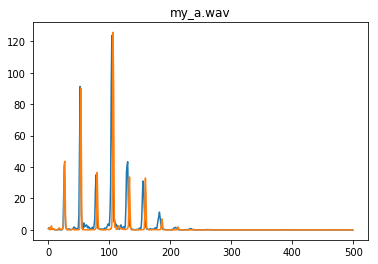

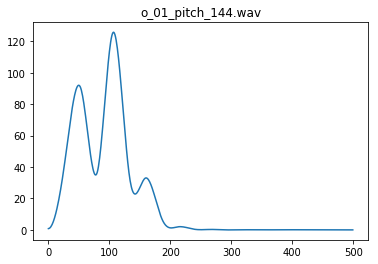

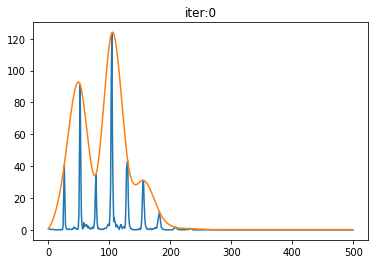

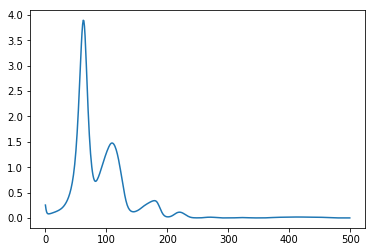

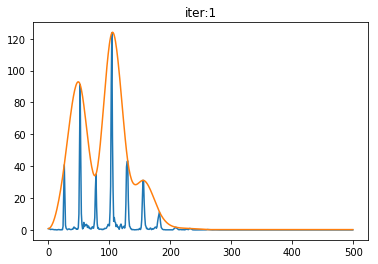

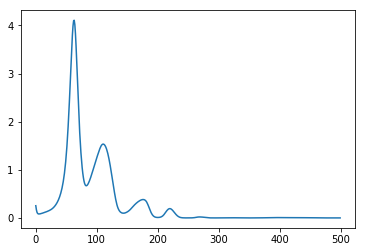

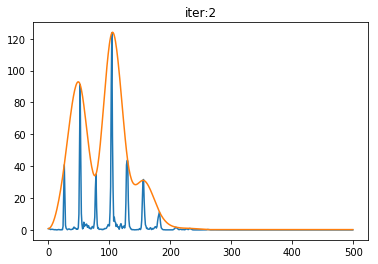

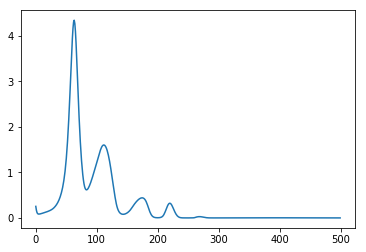

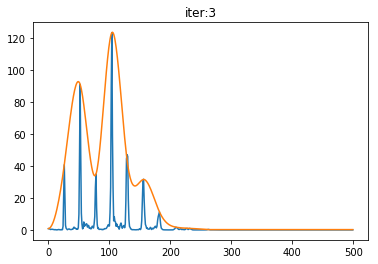

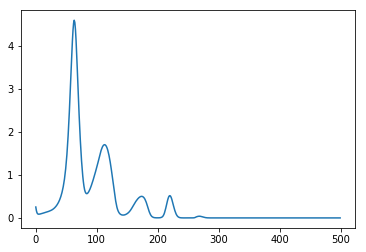

(88200,) 44100


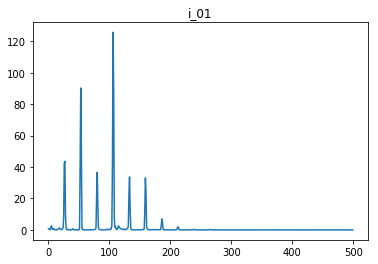

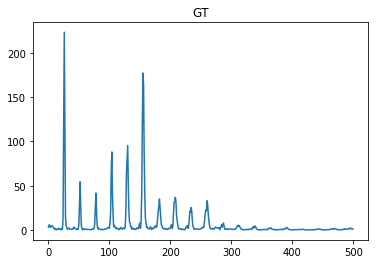

In [153]:
x,fs = sf.read('a_01.wav')

frame_period = 10
which_seg = 10
showN = 500
_NFFT_ = 8192
def getAmpPha(src):
    x,fs = sf.read(src)
    X = librosa.stft(x,n_fft=_NFFT_,win_length = 8192, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    phaX = X/absX
    return absX,phaX
def getCurve(seg_A,seg_B):
    peaks_A, _ = find_peaks(seg_A, distance=15)
    peaks_B, _ = find_peaks(seg_B, distance=15)
    peaks_A =  np.insert(peaks_A, 0, 0, axis=0)
    peaks_B =  np.insert(peaks_B, 0, 0, axis=0)
    
    c1 = scipy.interpolate.spline(peaks_A,seg_A[peaks_A],range(showN),order=3)
    c2 = scipy.interpolate.spline(peaks_B,seg_B[peaks_B],range(showN),order=3)
    c1 = np.maximum(c1,0.2)
    curve = c2/c1

    
    return curve,c1,c2
t_src = 'my_a.wav'
v_src = 'o_01_pitch_144.wav'
# v_src = 'e_01.wav'


absT,phaT = getAmpPha(t_src)
absV,_ = getAmpPha(v_src)
absGT,_ = getAmpPha('my_a.wav')


###################################
seg_A = cp.copy(absT[:showN,which_seg])
seg_GT = cp.copy(absGT[:showN,which_seg])
seg_B = cp.copy(absV[:showN,which_seg])

curve_,_,c2 = getCurve(seg_A,seg_B)
# plt.plot(seg_B)
seg_A *= curve_
plt.title(t_src)
plt.plot(seg_A)
plt.plot(seg_B)

plt.show()

plt.title(v_src)

plt.plot(c2)
plt.show()


for i in range(4):
    curve_tmp,c1,_ = getCurve(seg_A,seg_B)

    curve_ *= curve_tmp
    seg_A *= curve_tmp
    plt.title('iter:'+str(i))
    plt.plot(seg_A)
    plt.plot(c1)
    plt.show()
    
    plt.plot(curve_)
    plt.show()
    
    

curve = np.ones((int(_NFFT_/2)+1,))

curve[:showN] = curve_
# curve[:10]  = 1
out = modify_specEnv(absT,curve)
xx = librosa.istft(out*phaT,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.8
print(xx.shape,fs)
sf.write('my_i_to_a01.wav', xx, fs)

plt.title('i_01')
plt.plot(seg_B)
plt.show()
plt.title('GT')
plt.plot(seg_GT)
plt.show()

ipd.Audio(xx, rate=fs)



In [3]:

plt.plot(my_A[:250,10])
# plt.plot(A_01[:250,10]*2.5)
plt.show()
plt.plot(A_01[:250,10]*2.5)
plt.show()
x,fs = sf.read('a_01.wav')
ipd.Audio(x, rate=fs)

NameError: name 'getAmpPha' is not defined

In [2]:
seg = cp.copy(absi[:250,10])
# seg = cp.copy(absA01[:250,which_seg])
peaks,_ = find_peaks(seg, distance=5)
peaks =  np.insert(peaks, 0, 0, axis=0)
c = scipy.interpolate.spline(peaks,seg[peaks],range(250))
plt.plot(seg)
plt.plot(c)
plt.show()

NameError: name 'absi' is not defined

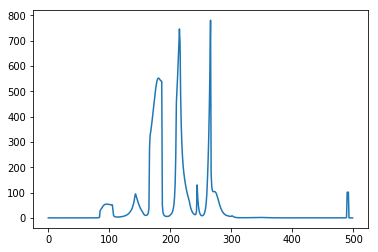

In [386]:
plt.plot(curve_)
plt.show()

# Log interp

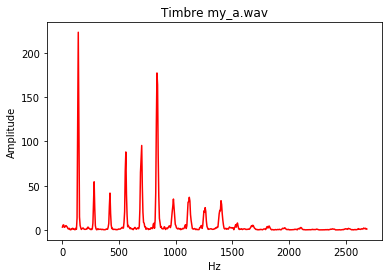

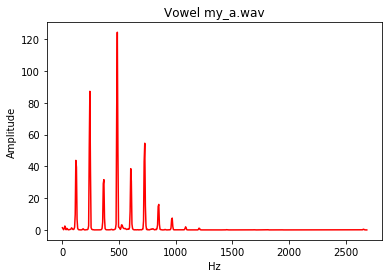

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


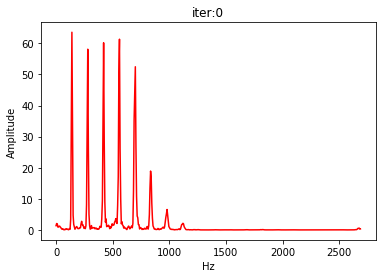

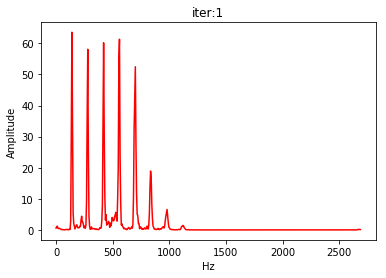

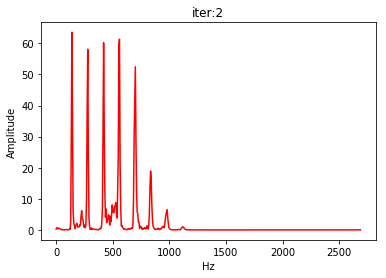

RuntimeError: Error opening 'pitch_110_o.wav': System error.

In [157]:
frame_period = 10
which_seg = 10
showN = 500
_NFFT_ = 8192
fs = 44100
HOP_LEN = int(44100/(1000/frame_period))
def plot_power_spec(x,title='Fig',nfft=_NFFT_):
    k = np.arange(nfft)
    T = _NFFT_/fs
    frq = k/T # two sides frequency range
    plt.xlabel('Hz')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.plot(frq[:len(x)],x,'r')
    plt.show()
def getAmpPha(src):
    x,fs = sf.read(src)
    X = librosa.stft(x,n_fft=_NFFT_,win_length = 8192, hop_length=HOP_LEN)
    absX = np.abs(X)
    phaX = X/absX
    return absX,phaX

def getCurve(seg_A,seg_B):
    peaks_A, _ = find_peaks(seg_A, distance=20)
    peaks_B, _ = find_peaks(seg_B, distance=20)
    peaks_A =  np.insert(peaks_A, 0, 0, axis=0)
    peaks_B =  np.insert(peaks_B, 0, 0, axis=0)
    
#     c1 = scipy.interpolate.BSpline(peaks_A,seg_A[peaks_A],2)(range(showN))
#     c2 = scipy.interpolate.BSpline(peaks_B,seg_B[peaks_B],2)(range(showN))

    c1 = scipy.interpolate.spline(peaks_A,seg_A[peaks_A],range(showN))
    c2 = scipy.interpolate.spline(peaks_B,seg_B[peaks_B],range(showN))
    
    c1 = np.maximum(c1,0.5)
    curve = np.power(10,c2-c1)

    
    return curve
t_src = 'my_a.wav'
v_src = 'o_01.wav'

absT,phaT = getAmpPha(t_src)
absV,_ = getAmpPha(v_src)
absGT,_ = getAmpPha('my_a.wav')


###################################
seg_A = cp.copy(absT[:showN,which_seg])
seg_GT = cp.copy(absGT[:showN,which_seg])
seg_B = cp.copy(absV[:showN,which_seg])

seg_A_log = np.log10(seg_A)
seg_B_log = np.log10(seg_B)

plot_power_spec(seg_A,'Timbre '+t_src)

plot_power_spec(seg_B,'Vowel '+t_src)

curve_ = getCurveLog(seg_A_log,seg_B_log)

seg_A *=curve_

plot_power_spec(seg_A,'iter:0')

for i in range(2):
    seg_A_log = np.log10(seg_A)
    curve_tmp = getCurve(seg_A_log,seg_B_log)
    curve_ *= curve_tmp
    seg_A *=curve_tmp

    plot_power_spec(seg_A,'iter:'+str(i+1))

curve = np.ones((int(_NFFT_/2)+1,))

curve[:showN] = curve_

out = modify_specEnv(absT,curve)
xx = librosa.istft(out*phaT,hop_length=HOP_LEN)
xx = xx/(max(xx)-min(xx))*0.4
sf.write('pitch_110_o.wav', xx, fs)

plt.title('a_01')
plt.plot(seg_B)
plt.show()


ipd.Audio(xx, rate=fs)



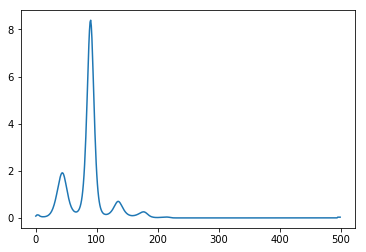

In [156]:
plt.plot(curve[:500])

In [117]:
from scipy.interpolate import BSpline
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-1, 2, 0, -1]
spl = BSpline(t, c, k)(0)
spl

array(-15.5)

In [81]:
import scipy
import librosa
import numpy as np
import soundfile  as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

def griffin_lim(stftm_matrix, shape,_NFFT_ = 8192, min_iter=20, max_iter=50, delta=20,frame_period=10):
    y = np.random.random(shape)
    y_iter = []

    for i in range(max_iter):
        if i >= min_iter and (i - min_iter) % delta == 0:
            y_iter.append((y, i))
        stft_matrix = librosa.core.stft(y,n_fft=_NFFT_,win_length = 8192, hop_length=int(44100/(1000/frame_period)))
        
        stft_matrix = stftm_matrix * stft_matrix / np.abs(stft_matrix)
        y = librosa.core.istft(stft_matrix,hop_length=HOP_LEN)
    return y
y = griffin_lim(out, 88200)

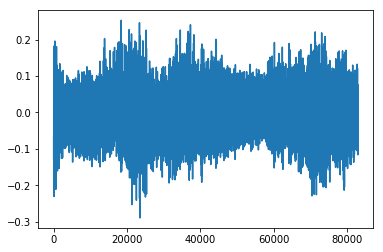

In [89]:
plt.plot(y[2000:85000])
ipd.Audio(y[2000:85000]*0.01, rate=fs)


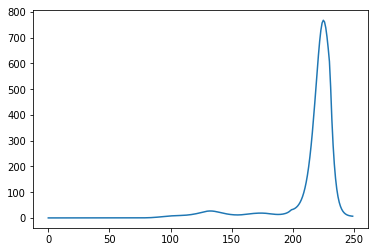

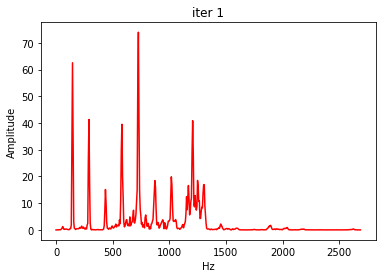

In [16]:
plt.plot(curve_[:250])
plt.show()
def plot_power_spec(x,title='Fig',nfft=_NFFT_):
    k = np.arange(nfft)
    T = _NFFT_/fs
    frq = k/T # two sides frequency range
    plt.xlabel('Hz')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.plot(frq[:len(x)],x,'r')
    plt.show()
plot_power_spec(seg_A,'iter 1')

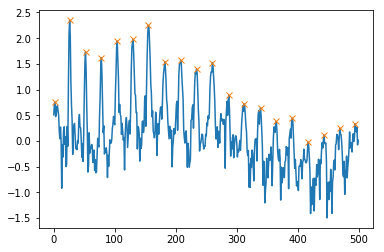

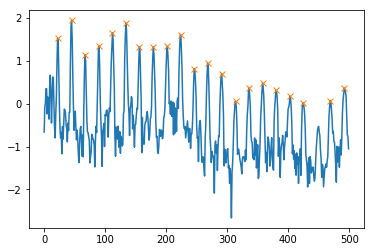

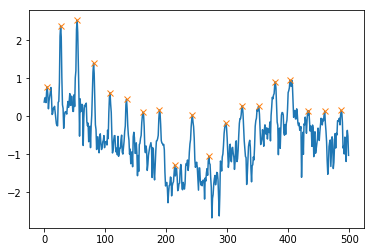

In [357]:
# absx,phai = getAmpPha('my_i.wav')
# absx,_ = getAmpPha('a_01.wav')

def plotLogPeak(seg_A):

    seg_A = np.log10(seg_A)
    peaks, _ = find_peaks(seg_A, distance=20)
#     peaks, properties = find_peaks(seg_A, prominence=(None, 0.1))
    plt.plot(seg_A)
    plt.plot(peaks, seg_A[peaks], "x")
    plt.show()
absx,_ = getAmpPha('my_a.wav')
seg_A = cp.copy(absx[:showN,which_seg])
plotLogPeak(seg_A)
absx,_ = getAmpPha('a_01.wav')
seg_A = cp.copy(absx[:showN,which_seg])
plotLogPeak(seg_A)
absx,_ = getAmpPha('my_i.wav')
seg_A = cp.copy(absx[:showN,which_seg])
plotLogPeak(seg_A)


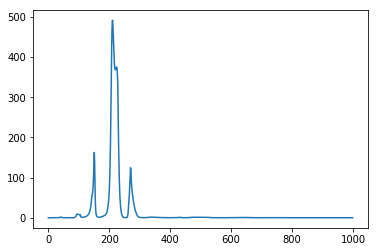

In [283]:
c = cp.copy(curve_)
# c[40:60]
plt.plot(c)
plt.show()

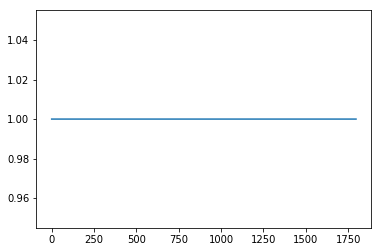

In [173]:
# foo = get_curve_by_tbl(2048,a2i)
foo = np.ones((2048,))
plt.plot(foo[250:])

In [394]:
from scipy.signal import remez, minimum_phase, freqz, group_delay
import matplotlib.pyplot as plt
freq = [0, 0.2, 0.3, 1.0]
desired = [1, 0]
h_linear = remez(151, freq, desired, Hz=2.)

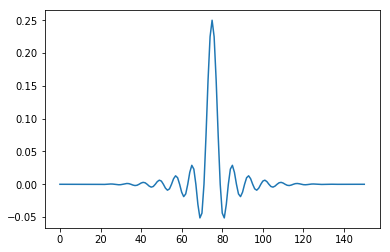

In [396]:
plt.plot(h_linear)
plt.show()

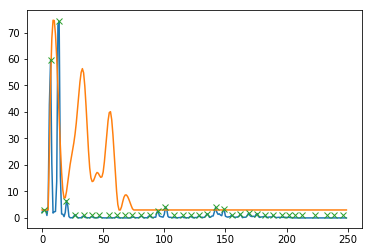

In [63]:
plt.plot(absi[:250,10])
plt.plot(c1[:250]*3)

plt.plot(peaks_i, c2[peaks_i], "x")
plt.show()

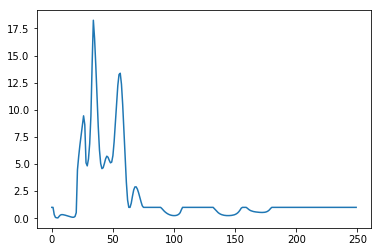

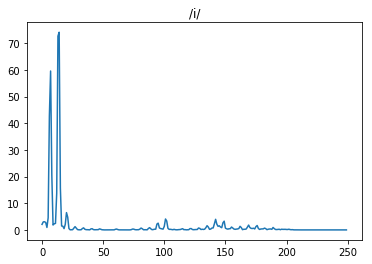

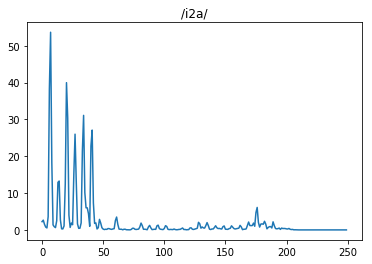

In [17]:
plt.plot(curve_)
plt.show()
tmp,fs = sf.read('my_i.wav')
pSpec(tmp,'/i/')  
tmp,fs = sf.read('test2.wav')
pSpec(tmp,'/i2a/')  

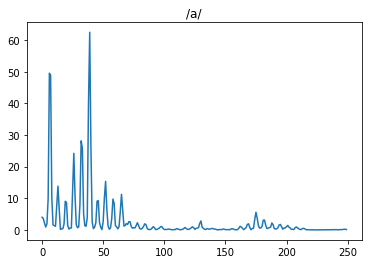

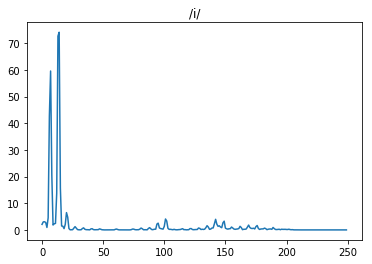

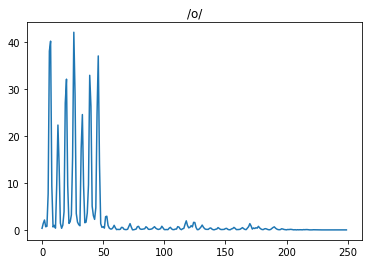

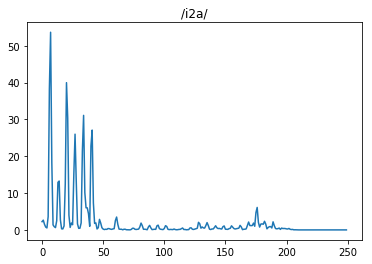

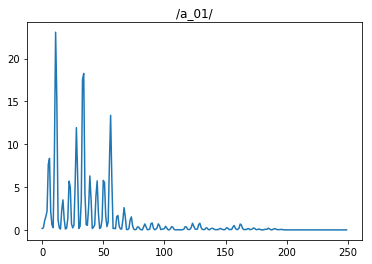

In [14]:
def pSpec(x,t = 'spec',which = 10):
    X = librosa.stft(x,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    plt.title(t)
    plt.plot(absX[:250,which])
    plt.show()
tmp,fs = sf.read('my_a.wav')
pSpec(tmp,'/a/')  
tmp,fs = sf.read('my_i.wav')
pSpec(tmp,'/i/')  
tmp,fs = sf.read('my_o.wav')
pSpec(tmp,'/o/')    

tmp,fs = sf.read('test2.wav')
pSpec(tmp,'/i2a/')  
tmp,fs = sf.read('a_01.wav')
pSpec(tmp,'/a_01/')    




In [312]:
import copy as cp
i2a = [0,-23,-32,-30,-32,-13,-6,2,10,30,20,20,10,-32,-32,-13,-10,0]
foo,fs = sf.read('my_i.wav')

frame_period = 10
Fi = librosa.stft(foo,n_fft=2048, hop_length=int(44100/(1000/frame_period)))
absFi = np.abs(Fi)
phaFi = Fi/absFi
curve = get_curve(2048,i2a)

out = modify_specEnv(absFi,curve)

xx = librosa.istft(out*phaFi,hop_length=int(44100/(1000/frame_period)))
xx = xx/max(xx)*0.7
ipd.Audio(xx, rate=fs)

C:\Users\a1989\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
